In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [2]:
df = pd.read_csv('Development Index.csv')

In [3]:
df.head()

,Population,Area (sq. mi.),Pop. Density,GDP ($ per capita),Literacy (%),Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


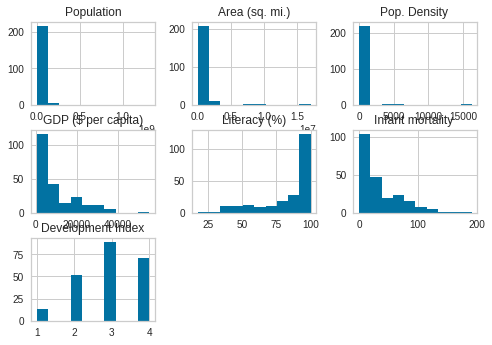

In [4]:
hist = df.hist()

In [5]:
X=df[['Population', 'Area (sq. mi.)', 'Pop. Density ']]  #'GDP ($ per capita)', 'Literacy (%)', 'Infant mortality ']]
#Labels
y=df['Development Index']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
clf=RandomForestClassifier(n_estimators=5, verbose = 1)

clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=5, verbose=1)

In [26]:
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


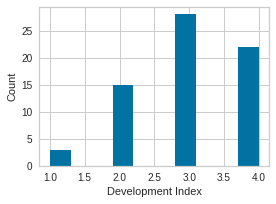

In [27]:
plt.figure(figsize=(4, 3))
plt.hist(y_test)
plt.xlabel('Development Index')
plt.ylabel('Count')
plt.tight_layout()

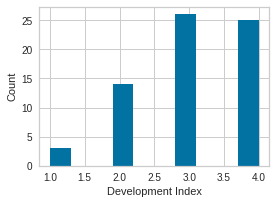

In [28]:
plt.figure(figsize=(4, 3))
plt.hist(y_pred)
plt.xlabel('Development Index')
plt.ylabel('Count')
plt.tight_layout()

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.39705882352941174


In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.29      0.27      0.28        15
           3       0.46      0.43      0.44        28
           4       0.35      0.41      0.38        22

    accuracy                           0.37        68
   macro avg       0.27      0.28      0.27        68
weighted avg       0.37      0.37      0.37        68

